<a href="https://colab.research.google.com/github/JuanCaG8a/Repositorio-Metodos-1/blob/main/Tarea6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

Ejercicios axiomas de probabilidad

1)

2)

3)

Ejercicios Teorema de Bayes
1, 2, 3 y 4

In [2]:
# 1) Un medico ha observado que el 40% de sus pacientes fuma. De este 40% el 75% son hombres. Entre los pacientes que no fuman, el 60% son mujeres.
# Si se selecciona un paciente al azar:
Pf = 0.4 #probabilidad de que el paciente fume
Ph_f = 0.75 #probabilidad hombre que fuma
Pm_nf = 0.6 #Probabilidad mujer que no fuma

Pnf = 1-Pf #probabilidad de que el paciente no fume
Pm_f = 1-Ph_f #Probabilidad de que fume y sea mujer

  # a)¿Cual es la probabilidad de que sea mujer? P(M) = 23/50.
Pm = Pm_f * Pf + Pm_nf * Pnf
print(f"La probabilidad de que sea mujer es: {Pm:.2f} (23/50 en fracción)")

  # b)¿Cual es la probabilidad de que sea hombre y fume? P(F ∩ H) = 3/10.
Phyf = Ph_f *Pf
print(f"La probabilidad de que sea hombre y fume es: {Phyf:.2f} (3/10 en fracción)")

  # c) Si el paciente es mujer, ¿cual es la probabilidad de que fume? P(F/M) = 5/23.
Pmyf = Pm_f * Pf / Pm
print(f"La probabilidad de que sea mujer y fume es: {Pmyf:.2f} (5/23 en fracción)")


La probabilidad de que sea mujer es: 0.46 (23/50 en fracción)
La probabilidad de que sea hombre y fume es: 0.30 (3/10 en fracción)
La probabilidad de que sea mujer y fume es: 0.22 (5/23 en fracción)


In [3]:
# 2) Suponga que se quiere estimar el numero medio de estudiantes que se aproximan a la secretaria de fısica siguiendo una distribucion de Poisson.
# El problema podria tener informacion inicial que puede ser utilizada como una funcion a priori de probabilidad. Esto asigna probabilidades a los posibles valores del parametro λ.
# Supongamos que el numero medio a priori de estudiantes es: 1,2,3,4 con las probabilidades Π(λ) = [0.4, 0.3, 0.2, 0.1] segun las secretarias 1,2,3 y 4 (informacion subjetiva).
# El numero de estudiantes observados durante cierto intervalo de tiempo es x = 4.

λs = np.array([1, 2, 3, 4])
proba_λ = np.array([0.4, 0.3, 0.2, 0.1])
x = 4

# a) Haga la estimacion inicial del parametro λˆ. (Ans: λˆ = 2.0)
λ_ini = np.sum(λs * proba_λ)
print(f"La estimación inicial del parámetro λ^ es: {λ_ini:.1f}")

# b) Calcule la funcion de verosimilitud de la observacion para cada modelo  P(x/λ_i) = L(x/λ_i) donde i = 1, 2, 3, 4.
def poisson(x, lambd):
    return (lambd ** x * math.exp(-lambd)) / math.factorial(x)

likelihoods = np.array([poisson(x, lambd) for lambd in λs])
print("\nFunciones de verosimilitud:")
for i, likelihood in enumerate(likelihoods):
    print(f"P(x=4 | λ={λs[i]}) = {likelihood:.6f}")

# c) Aplicando el teorema de Bayes, calcule la funcion de distribucion a posteriori para cada modelo: P(λ_i/x) = L(x/λ_i) Π(λ_i) / sum∀j L(x/λ_j)Π(λ_j)    i,j = 1, 2, 3, 4
num_post = likelihoods * proba_λ
proba_post = num_post / np.sum(num_post)
print("\nDistribución a posteriori (P(λ_i | x=4)):")
for i, post in enumerate(proba_post):
    print(f"P(λ={λs[i]} | x=4) = {post:.6f}")

# d) Verifique que la distribucion posterior esta normalizada.
sum_posterior = np.sum(proba_post)
print(f"\nVerificación de normalización: Suma de probabilidades = {sum_posterior:.2f}")

# e) Indique el modelo que mas probablemente explique los datos.
max_posterior_index = np.argmax(proba_post)
print(f"\nEl modelo más probable es λ = {λs[max_posterior_index]} "
      f"con probabilidad {proba_post[max_posterior_index]:.6f}")

# f) Usando la informacion subjetiva de cada secretaria y la verosimilitud de la observacion (i,e. la distribucion a posteriori). Calcule el mejor parametro λˆ. (Ans: λˆ = 2.77)
lambda_post = np.sum(λs * proba_post)
print(f"\nNueva estimación del parámetro λ: {lambda_post:.2f}")




La estimación inicial del parámetro λ^ es: 2.0

Funciones de verosimilitud:
P(x=4 | λ=1) = 0.015328
P(x=4 | λ=2) = 0.090224
P(x=4 | λ=3) = 0.168031
P(x=4 | λ=4) = 0.195367

Distribución a posteriori (P(λ_i | x=4)):
P(λ=1 | x=4) = 0.071013
P(λ=2 | x=4) = 0.313489
P(λ=3 | x=4) = 0.389226
P(λ=4 | x=4) = 0.226273

Verificación de normalización: Suma de probabilidades = 1.00

El modelo más probable es λ = 3 con probabilidad 0.389226

Nueva estimación del parámetro λ: 2.77


In [4]:
# 3) En el problema anterior, imagine que en el primer intervalo de tiempo el numero observado de estudiantes es x_1 = 4,
# en el siguiente intervalo de tiempo el numero de estudiantes es x_2 = 5. Realice todos los pasos anteriores del a) al f) teniendo en cuenta el likelihood conjunto.
# (Ans: λˆ = 3.27)

λs = np.array([1, 2, 3, 4])
proba_λ = np.array([0.4, 0.3, 0.2, 0.1])
x1 = 4
x2 = 5

# a) Haga la estimacion inicial del parametro λˆ.
λ_ini = np.sum(λs * proba_λ)
print(f"La estimación inicial del parámetro λ^ es: {λ_ini:.1f}")

# b) Calcule la funcion de verosimilitud de la observacion para cada modelo  P(x/λ_i) = L(x/λ_i) donde i = 1, 2, 3, 4.
def poisson(x, lambd):
    return (lambd ** x * math.exp(-lambd)) / math.factorial(x)

likelihoods_conj = np.array([poisson(x1, lambd) * poisson(x2, lambd) for lambd in λs])
print("\nFunciones de verosimilitud:")
for i, likelihood in enumerate(likelihoods_conj):
    print(f"P(x=4 | λ={λs[i]}) = {likelihood:.6f}")

# c) Aplicando el teorema de Bayes, calcule la funcion de distribucion a posteriori para cada modelo: P(λ_i/x) = L(x/λ_i) Π(λ_i) / sum∀j L(x/λ_j)Π(λ_j)    i,j = 1, 2, 3, 4
num_post = likelihoods_conj * proba_λ
proba_post_conj = num_post / np.sum(num_post)
print("\nDistribución a posteriori (P(λ_i | x=4)):")
for i, post in enumerate(proba_post_conj):
    print(f"P(λ={λs[i]} | x=4) = {post:.6f}")

# d) Verifique que la distribucion posterior esta normalizada.
sum_posterior = np.sum(proba_post_conj)
print(f"\nVerificación de normalización: Suma de probabilidades = {sum_posterior:.2f}")

# e) Indique el modelo que mas probablemente explique los datos.
max_posterior_index = np.argmax(proba_post_conj)
print(f"\nEl modelo más probable es λ = {λs[max_posterior_index]} "
      f"con probabilidad {proba_post_conj[max_posterior_index]:.6f}")

# f) Usando la informacion subjetiva de cada secretaria y la verosimilitud de la observacion (i,e. la distribucion a posteriori). Calcule el mejor parametro λˆ. (Ans: λˆ = 2.77)
lambda_post = np.sum(λs * proba_post_conj)
print(f"\nNueva estimación del parámetro λ^: {lambda_post:.2f}")

La estimación inicial del parámetro λ^ es: 2.0

Funciones de verosimilitud:
P(x=4 | λ=1) = 0.000047
P(x=4 | λ=2) = 0.003256
P(x=4 | λ=3) = 0.016941
P(x=4 | λ=4) = 0.030535

Distribución a posteriori (P(λ_i | x=4)):
P(λ=1 | x=4) = 0.002527
P(λ=2 | x=4) = 0.131344
P(λ=3 | x=4) = 0.455565
P(λ=4 | x=4) = 0.410564

Verificación de normalización: Suma de probabilidades = 1.00

El modelo más probable es λ = 3 con probabilidad 0.455565

Nueva estimación del parámetro λ^: 3.27


Probabilidad de detección, P(D): 0.65


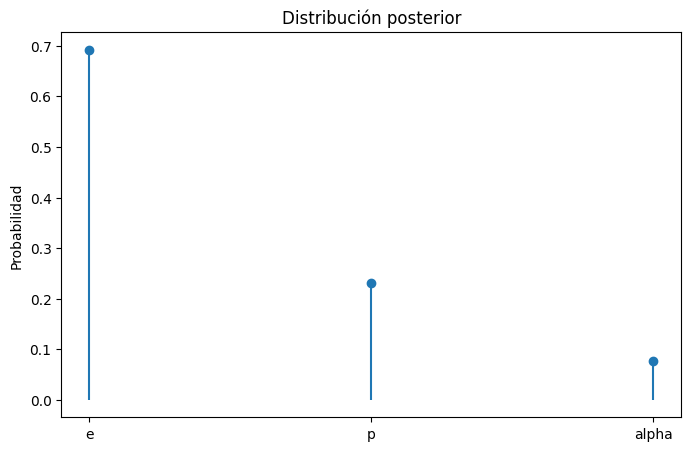

Probabilidad de ser electrón: P(e | D) = 0.6923
Probabilidad de ser protón: P(p | D) = 0.2308
Probabilidad de ser alfa: P(alpha | D) = 0.0769


In [5]:
# 4) Un haz de partículas compuesto por electrones, protones y partículas a, atraviesa un detector de partículas, que tiene una eficiencia de detección de 90%, 60% y 20% respectivamente. El flujo de electrones es el doble que el de protones y partículas a.

Ee = 0.9 #eficiencia electrones
Ep = 0.6 #eficiencia protones
Ea = 0.2 #eficiencia particulas alfa

  # a) Escriba la densidad de probabilidad a priori I(D/p), donde p = electron, proton, a.
Pe = 0.5
Pp = 0.25
Pa = 0.25

  # b) Si se elije una partícula al azar, ¿cuál es la probabilidad de que sea detectada. P(D) = 0.65.
Pd = (Ee * Pe) + (Ep * Pp) + (Ea * Pa) #Probabilidad de detección
print(f"Probabilidad de detección, P(D): {Pd:.2f}")

  # c) Dibuje la función de probabilidad posterior usando plt. stem(Posterior).
Ped = (Ee * Pe) / Pd
Ppd = (Ep * Pp) / Pd
Pad = (Ea * Pa) / Pd

# Crear etiquetas y valores para la gráfica
labels = ['e', 'p', 'alpha']
Proba_posterior = [Ped, Ppd, Pad]

# Gráfica de probabilidades posteriores
plt.figure(figsize=(8, 5))
plt.stem(labels, Proba_posterior, basefmt=" ")
plt.title("Distribución posterior")
plt.ylabel("Probabilidad")
plt.show()

  # d) Si para una partícula dada el detector da señal, ¿cuál es la probabilidad de que sea cada una de las partículas. P(e/D) = 0.6923, P(p/D) = 0.2307, P(a/D) = 0.0076.
print(f"Probabilidad de ser electrón: P(e | D) = {Ped:.4f}")
print(f"Probabilidad de ser protón: P(p | D) = {Ppd:.4f}")
print(f"Probabilidad de ser alfa: P(alpha | D) = {Pad:.4f}")



Generales de probabilidad:
Del 1 al 7 y el 12

In [6]:
# 1) Se lanza un dado equi-probable dos veces. Dados los siguientes eventos:
# A) La suma de los resultados es menor o igual a 3.
# B) El resultado del primer lanzamiento es impar.
# Calcular P(A) = 1/12, P(B) = 1/2, P(A ∪ B) = 19/36 y P(Ac) = 11/12

from itertools import product

Esp_m = list(product([1,2,3,4,5,6], repeat=2)) #Espacio muestral

# Evento A
A = [(x,y) for x, y in Esp_m if x + y <= 3]

# Evento B
B = [(x,y) for x, y in Esp_m if x % 2 != 0]

A_int_B = [(x,y) for x,y in A if x % 2 != 0]

P_A = len(A) / len(Esp_m)
P_B = len(B) / len(Esp_m)
P_A_int_B = len(A_int_B) / len(Esp_m)
P_A_un_B = P_A + P_B - P_A_int_B
P_Ac = 1 - P_A

print (f"P(A) =  {P_A:.4f}")
print (f"P(B) =  {P_B}")
print (f"P(A ∪ B) = {P_A_un_B:.4f}")
print (f"P(Ac) =  {P_Ac:.4f}")


P(A) =  0.0833
P(B) =  0.5
P(A ∪ B) = 0.5278
P(Ac) =  0.9167


In [7]:
# 2) Se prueban 5 celulares de un lote de 50 equipos donde existen 2 defectuosos. Si el muestreo se realiza sin reposicion.
# Hallar la probabilidad que al menos un celular sea defectuoso. P(A) = 47/245.
# Piense en Ac y en el principio multiplicativo o en una estrategia combinatoria.
from math import comb
Celulares = 50
Defectuosos = 2
No_def = Celulares - Defectuosos

Combinaciones = comb(Celulares, 5)
Comb_no_def = comb(No_def,5)

P_Ac = Comb_no_def / Combinaciones

P_A = 1 - P_Ac

print(f"P(A) o de al menos un celular defectuoso es: {P_A:.4f}")

P(A) o de al menos un celular defectuoso es: 0.1918


In [8]:
# 3) En una cierta ciudad el 60% de los propietarios estan suscritos al diario y el 80% al cable. Adicionalmente, el 50% estan suscritos a ambos.
# Si un propietario es elegido al azar:
  # (a) ¿Cual es la probabilidad que este suscrito a uno de los dos servicios? P(A ∪ B) = 0.9.
  # Probabilidades dadas
Pd = 0.6  # Suscrito al diario
Pc = 0.8  # Suscrito al cable
Pdyc = 0.5  # Suscrito a ambos

P_d_o_c = Pd + Pc - Pdyc

  # (b) ¿Cual es la probabilidad que este suscrito al diario o al cable, pero no a ambos servicios? P((A ∩ Bc) ∪ (B ∩ Ac)) = 0.4. P_solo_diario_o_cable = P_A + P_B - 2 * P_A_and_B
P_solo_d_o_c = Pd + Pc - 2 * Pdyc


print(f"La probabilidad de que el propietario este suscrito a uno de los servicios o P(A ∪ B): {P_d_o_c:.1f}")
print(f"La probabilidad de que el propietario este suscrito al diario o al cable pero no a ambos o P((A ∩ Bc) ∪ (B ∩ Ac)): {P_solo_d_o_c:.1f}")

La probabilidad de que el propietario este suscrito a uno de los servicios o P(A ∪ B): 0.9
La probabilidad de que el propietario este suscrito al diario o al cable pero no a ambos o P((A ∩ Bc) ∪ (B ∩ Ac)): 0.4


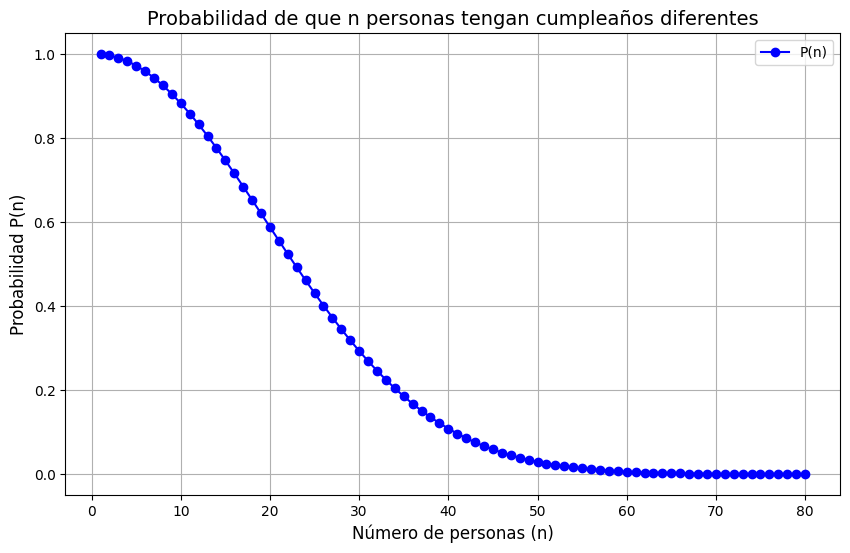

In [10]:
# 4) Calcular la probabilidad que n personas (n ≤ 365) tengan fechas diferentes de cumpleaños, i.e, escribir la formula general de calculo. Grafique la probabilidad P(n ≤ 80) como funcion de n.
# Los numeros son demasiado grandes, pero Python puede manejar dichas cantidades.

def Proba_cumpleaños(n):
    proba = 1
    for k in range(n):
        proba *= (365 - k) / 365
    return proba

# Valores de n desde 1 hasta 80
n_values = np.arange(1, 81)
p_values = [Proba_cumpleaños(n) for n in n_values]

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(n_values, p_values, marker='o', color='b', label='P(n)')
plt.title('Probabilidad de que n personas tengan cumpleaños diferentes', fontsize=14)
plt.xlabel('Número de personas (n)', fontsize=12)
plt.ylabel('Probabilidad P(n)', fontsize=12)
plt.grid()
plt.legend()
plt.show()

In [12]:
# 5) Se lanzan dos dados equi-probables y se observan los siguientes eventos:
  # a) La suma es 8: P(A) = 5/36.
  # b) El segundo dado es impar: P(B) = 1/2.
  # Calcule P(A ∩ B) y P(A) · P(B). ¿Que podria concluir?
P_A = 5 / 36  # Probabilidad de que la suma sea 8
P_B = 1 / 2   # Probabilidad de que el segundo dado sea impar

# Intersección
P_A_int_B = 2 / 36  # Casos favorables de A ∩ B

# Producto de probabilidades
P_A_punto_P_B = P_A * P_B

# Resultados
print(f"P(A) = {P_A:.4f}")
print(f"P(B) = {P_B}")
print(f"P(A ∩ B) = {P_A_int_B:.4f}")
print(f"P(A) · P(B) = {P_A_punto_P_B:.4f}")

P(A) = 0.1389
P(B) = 0.5
P(A ∩ B) = 0.0556
P(A) · P(B) = 0.0694


Podemos concluir que los eventos son dependientes

In [13]:
# 6) Se lanza simultaneamente 3 dados de 6 caras.
# ¿Cual es la probabilidad de obtener 1 par? P(A) = 5/12.
# Realice el calculo de esta probabilidad usando un experimento virtual con N = 105 eventos.

N = 105

# Contador para el evento de obtener exactamente 1 par
contador_pares = 0

for _ in range(N):
    # Lanzar tres dados
    dado = np.random.randint(1, 7, size=3)  # Genera tres números entre 1 y 6
    # Verificar si hay exactamente un par
    unique, counts = np.unique(dado, return_counts=True)
    if len(unique) == 2 and 2 in counts:  # Dos valores únicos, y uno aparece dos veces
        contador_pares += 1

# Calcular la probabilidad experimental
Proba_exp = contador_pares / N

# Resultados
print(f"Probabilidad teórica P(A) = 5/12 = {5/12:.4f}")
print(f"Probabilidad experimental P(A) = {Proba_exp:.4f}")

Probabilidad teórica P(A) = 5/12 = 0.4167
Probabilidad experimental P(A) = 0.4000


In [15]:
# 7) Se lanza simultaneamente 5 dados de 6 caras. ¿Cual es la probabilidad de obtener?
  # a) 1 par: P(A) = 25/54.
def proba_A():
    P_A = (comb(5, 2) * 6 * (5 * 4 * 3)) / (6**5)
    return P_A

  # b) 2 pares distintos: P(B) = 25/108.
def proba_B():
    P_B = (comb(6, 2) * comb(5, 2) * comb(3, 2) * 4) / (6**5)
    return P_B

  # c) 4 de la misma cara: P(C) = 25/1296.
def proba_C():
    P_C = (comb(5, 4) * 6 * 5) / (6**5)
    return P_C

print(f"P(A) (1 par): {proba_A():.4f} = 25/54")
print(f"P(B) (2 pares distintos): {proba_B():.4f} = 25/108")
print(f"P(C) (4 de la misma cara): {proba_C():.4f} = 25/1296")
  # Realice el calculo de la probabilidad de los numerales a) y b) usando un experimento virtual con N = 105 eventos.
N = 105

# Contadores para los eventos
cont_A = 0  # Evento A: 1 par
cont_B = 0  # Evento B: 2 pares distintos

for _ in range(N):
    # Lanzar 5 dados
    dice = np.random.randint(1, 7, size=5)
    unique, counts = np.unique(dice, return_counts=True)  # Valores únicos y sus frecuencias

    # Evento A: 1 par (un número aparece exactamente 2 veces, los demás son únicos)
    if len(unique) == 4 and 2 in counts:
        cont_A += 1

    # Evento B: 2 pares distintos (dos números aparecen exactamente 2 veces)
    if len(unique) == 3 and list(counts).count(2) == 2:
        cont_B += 1

# Calcular probabilidades experimentales
P_A_exp = cont_A / N
P_B_exp = cont_B / N

# Resultados
print(f"Probabilidad teórica P(A) = 25/54 = {25/54:.4f}")
print(f"Probabilidad experimental P(A) = {P_A_exp:.4f}")

print(f"Probabilidad teórica P(B) = 25/108 = {25/108:.4f}")
print(f"Probabilidad experimental P(B) = {P_B_exp:.4f}")


P(A) (1 par): 0.4630 = 25/54
P(B) (2 pares distintos): 0.2315 = 25/108
P(C) (4 de la misma cara): 0.0193 = 25/1296
Probabilidad teórica P(A) = 25/54 = 0.4630
Probabilidad experimental P(A) = 0.4667
Probabilidad teórica P(B) = 25/108 = 0.2315
Probabilidad experimental P(B) = 0.2000


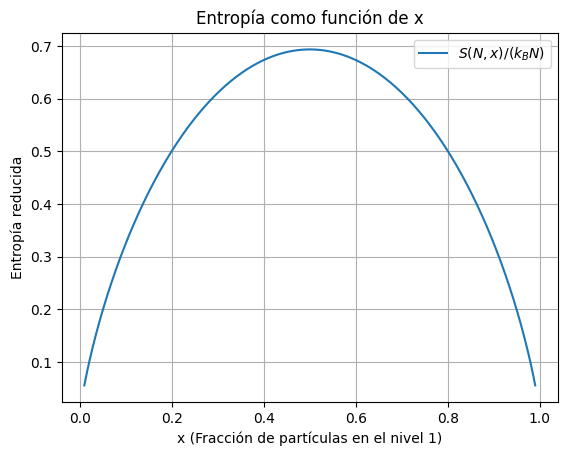

In [17]:
# 12)

# d) Dibuje la entropia S(N,x)/(k_BN) como funcion de x.
def entropia(x):
    return - (x * np.log(x) + (1 - x) * np.log(1 - x))

# Valores de x entre 0 y 1
x_values = np.linspace(0.01, 0.99, 500)  # Evitamos log(0)
S_values = entropia(x_values)

# Graficar
plt.plot(x_values, S_values, label=r"$S(N,x)/(k_B N)$")
plt.xlabel("x (Fracción de partículas en el nivel 1)")
plt.ylabel("Entropía reducida")
plt.title("Entropía como función de x")
plt.legend()
plt.grid()
plt.show()

Ejercicios tecnicas de conteo
2, 4, 6, 8, 10, 12, 14, 16, 18 y 20

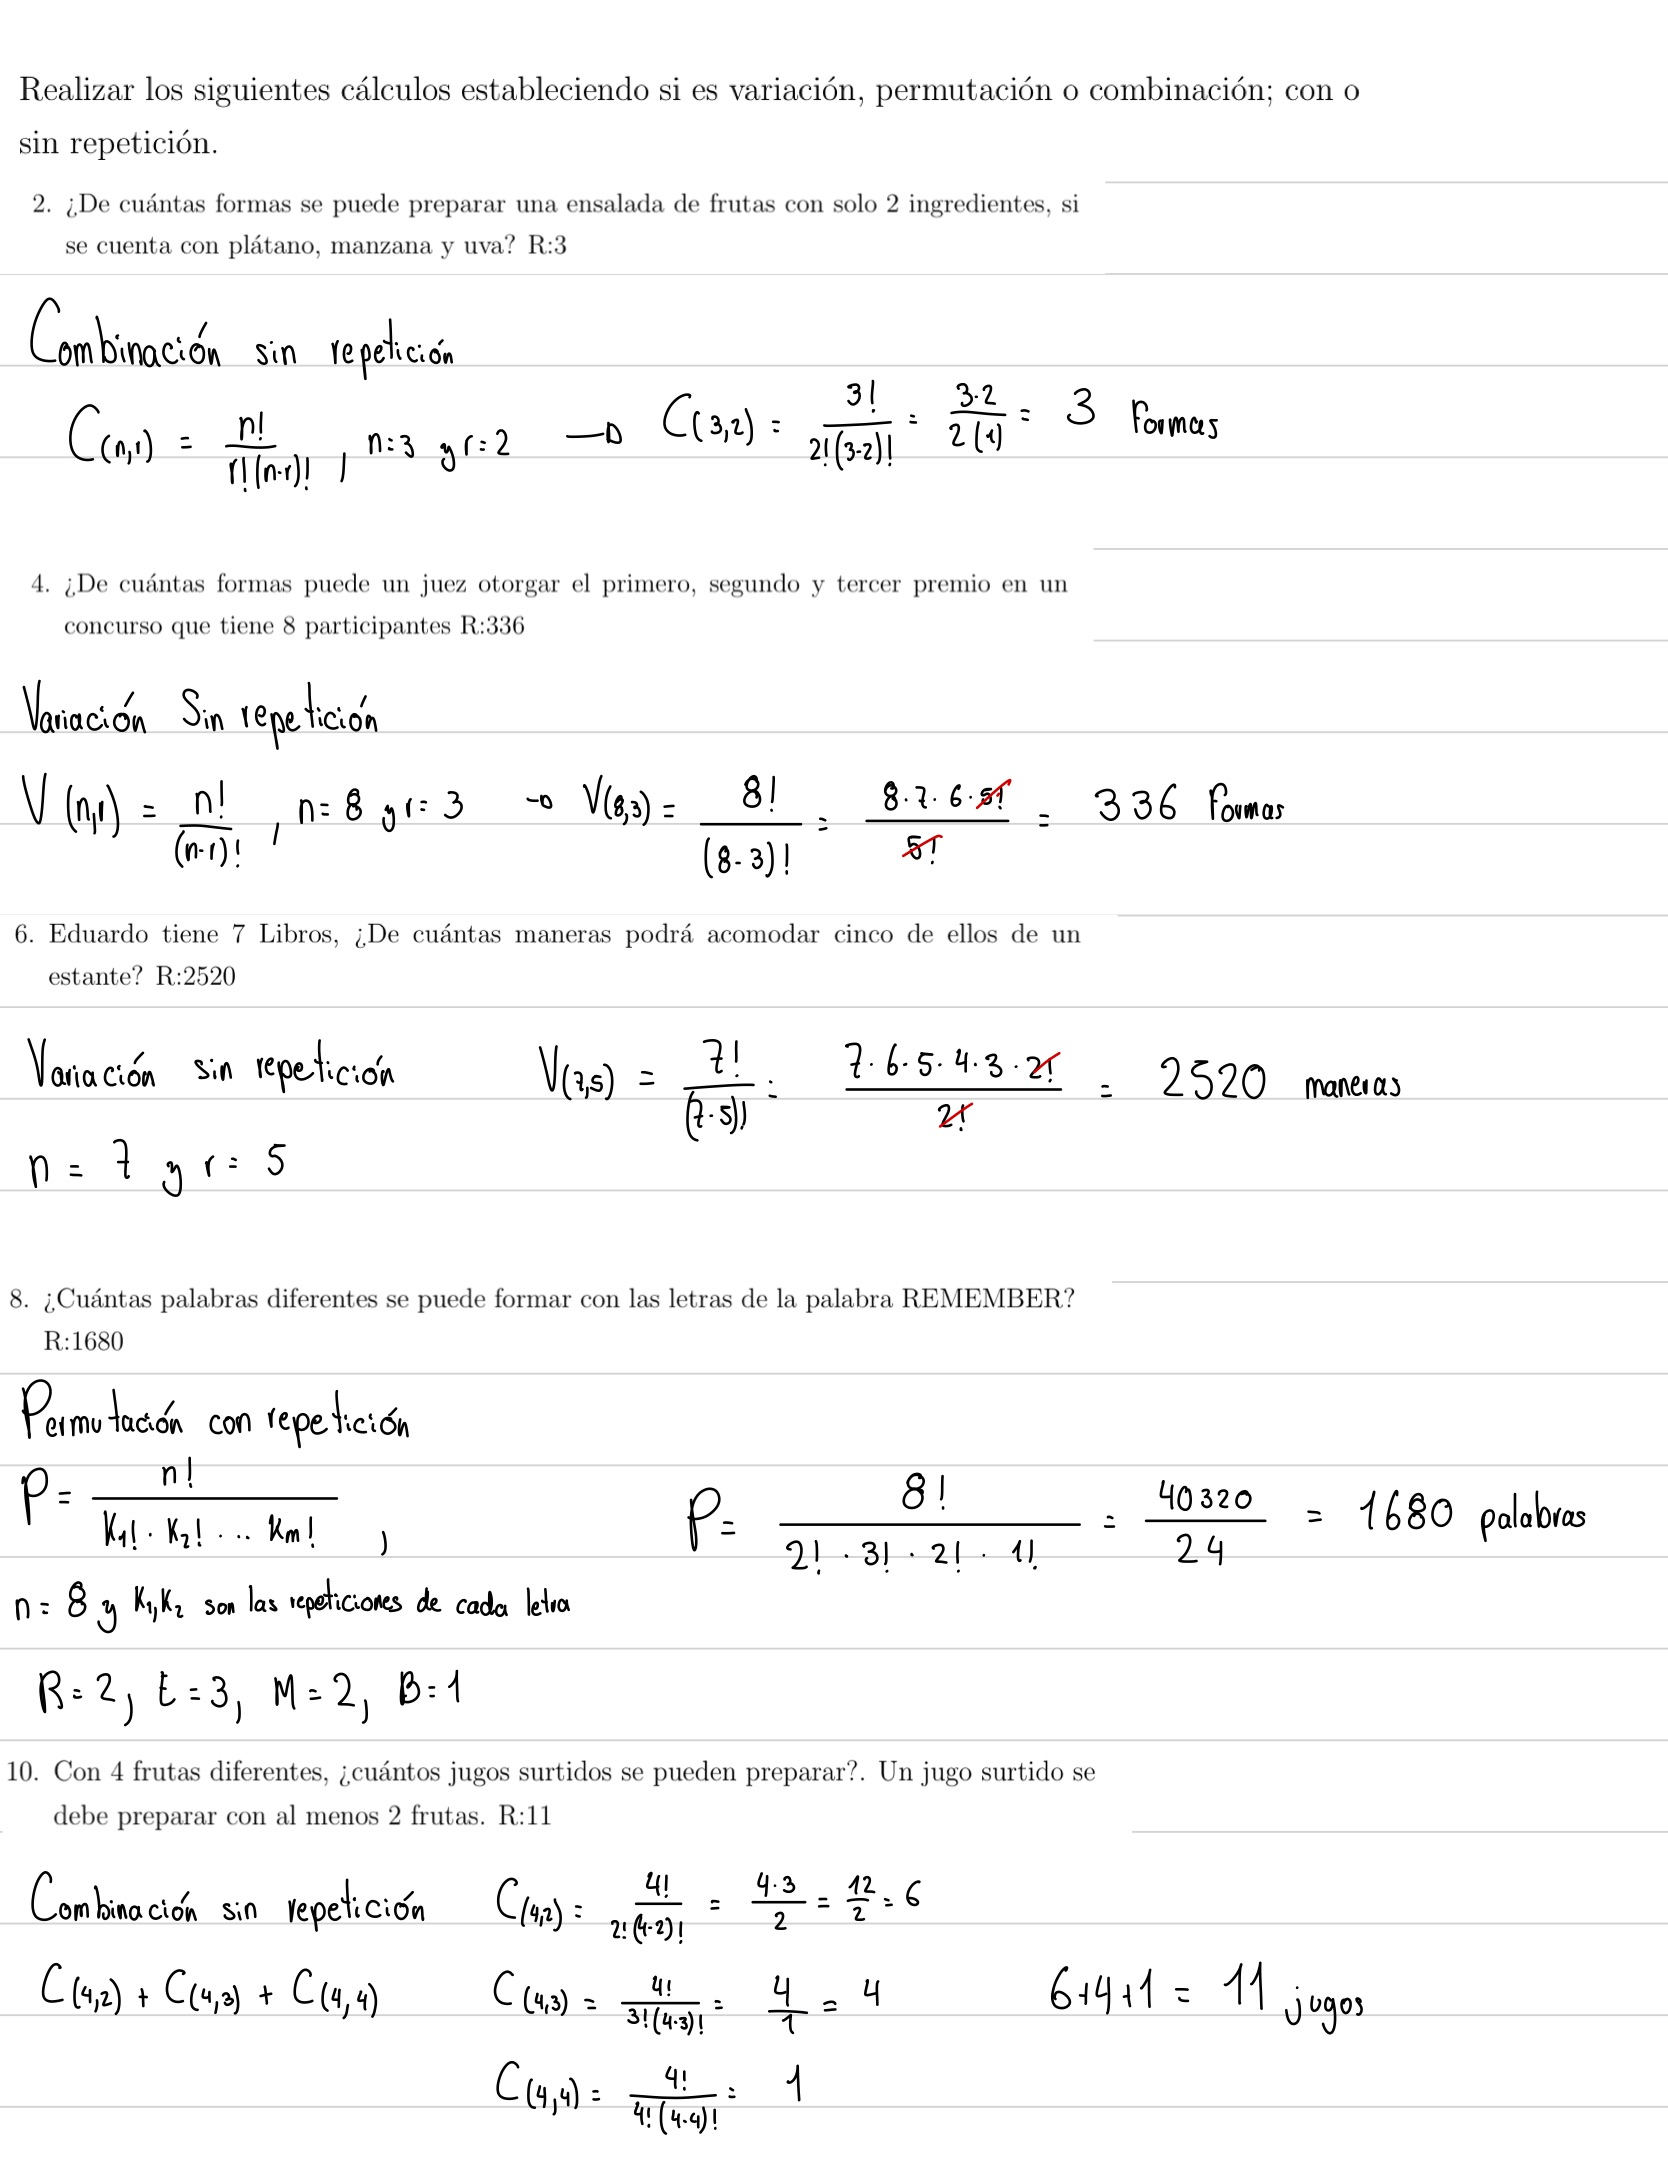

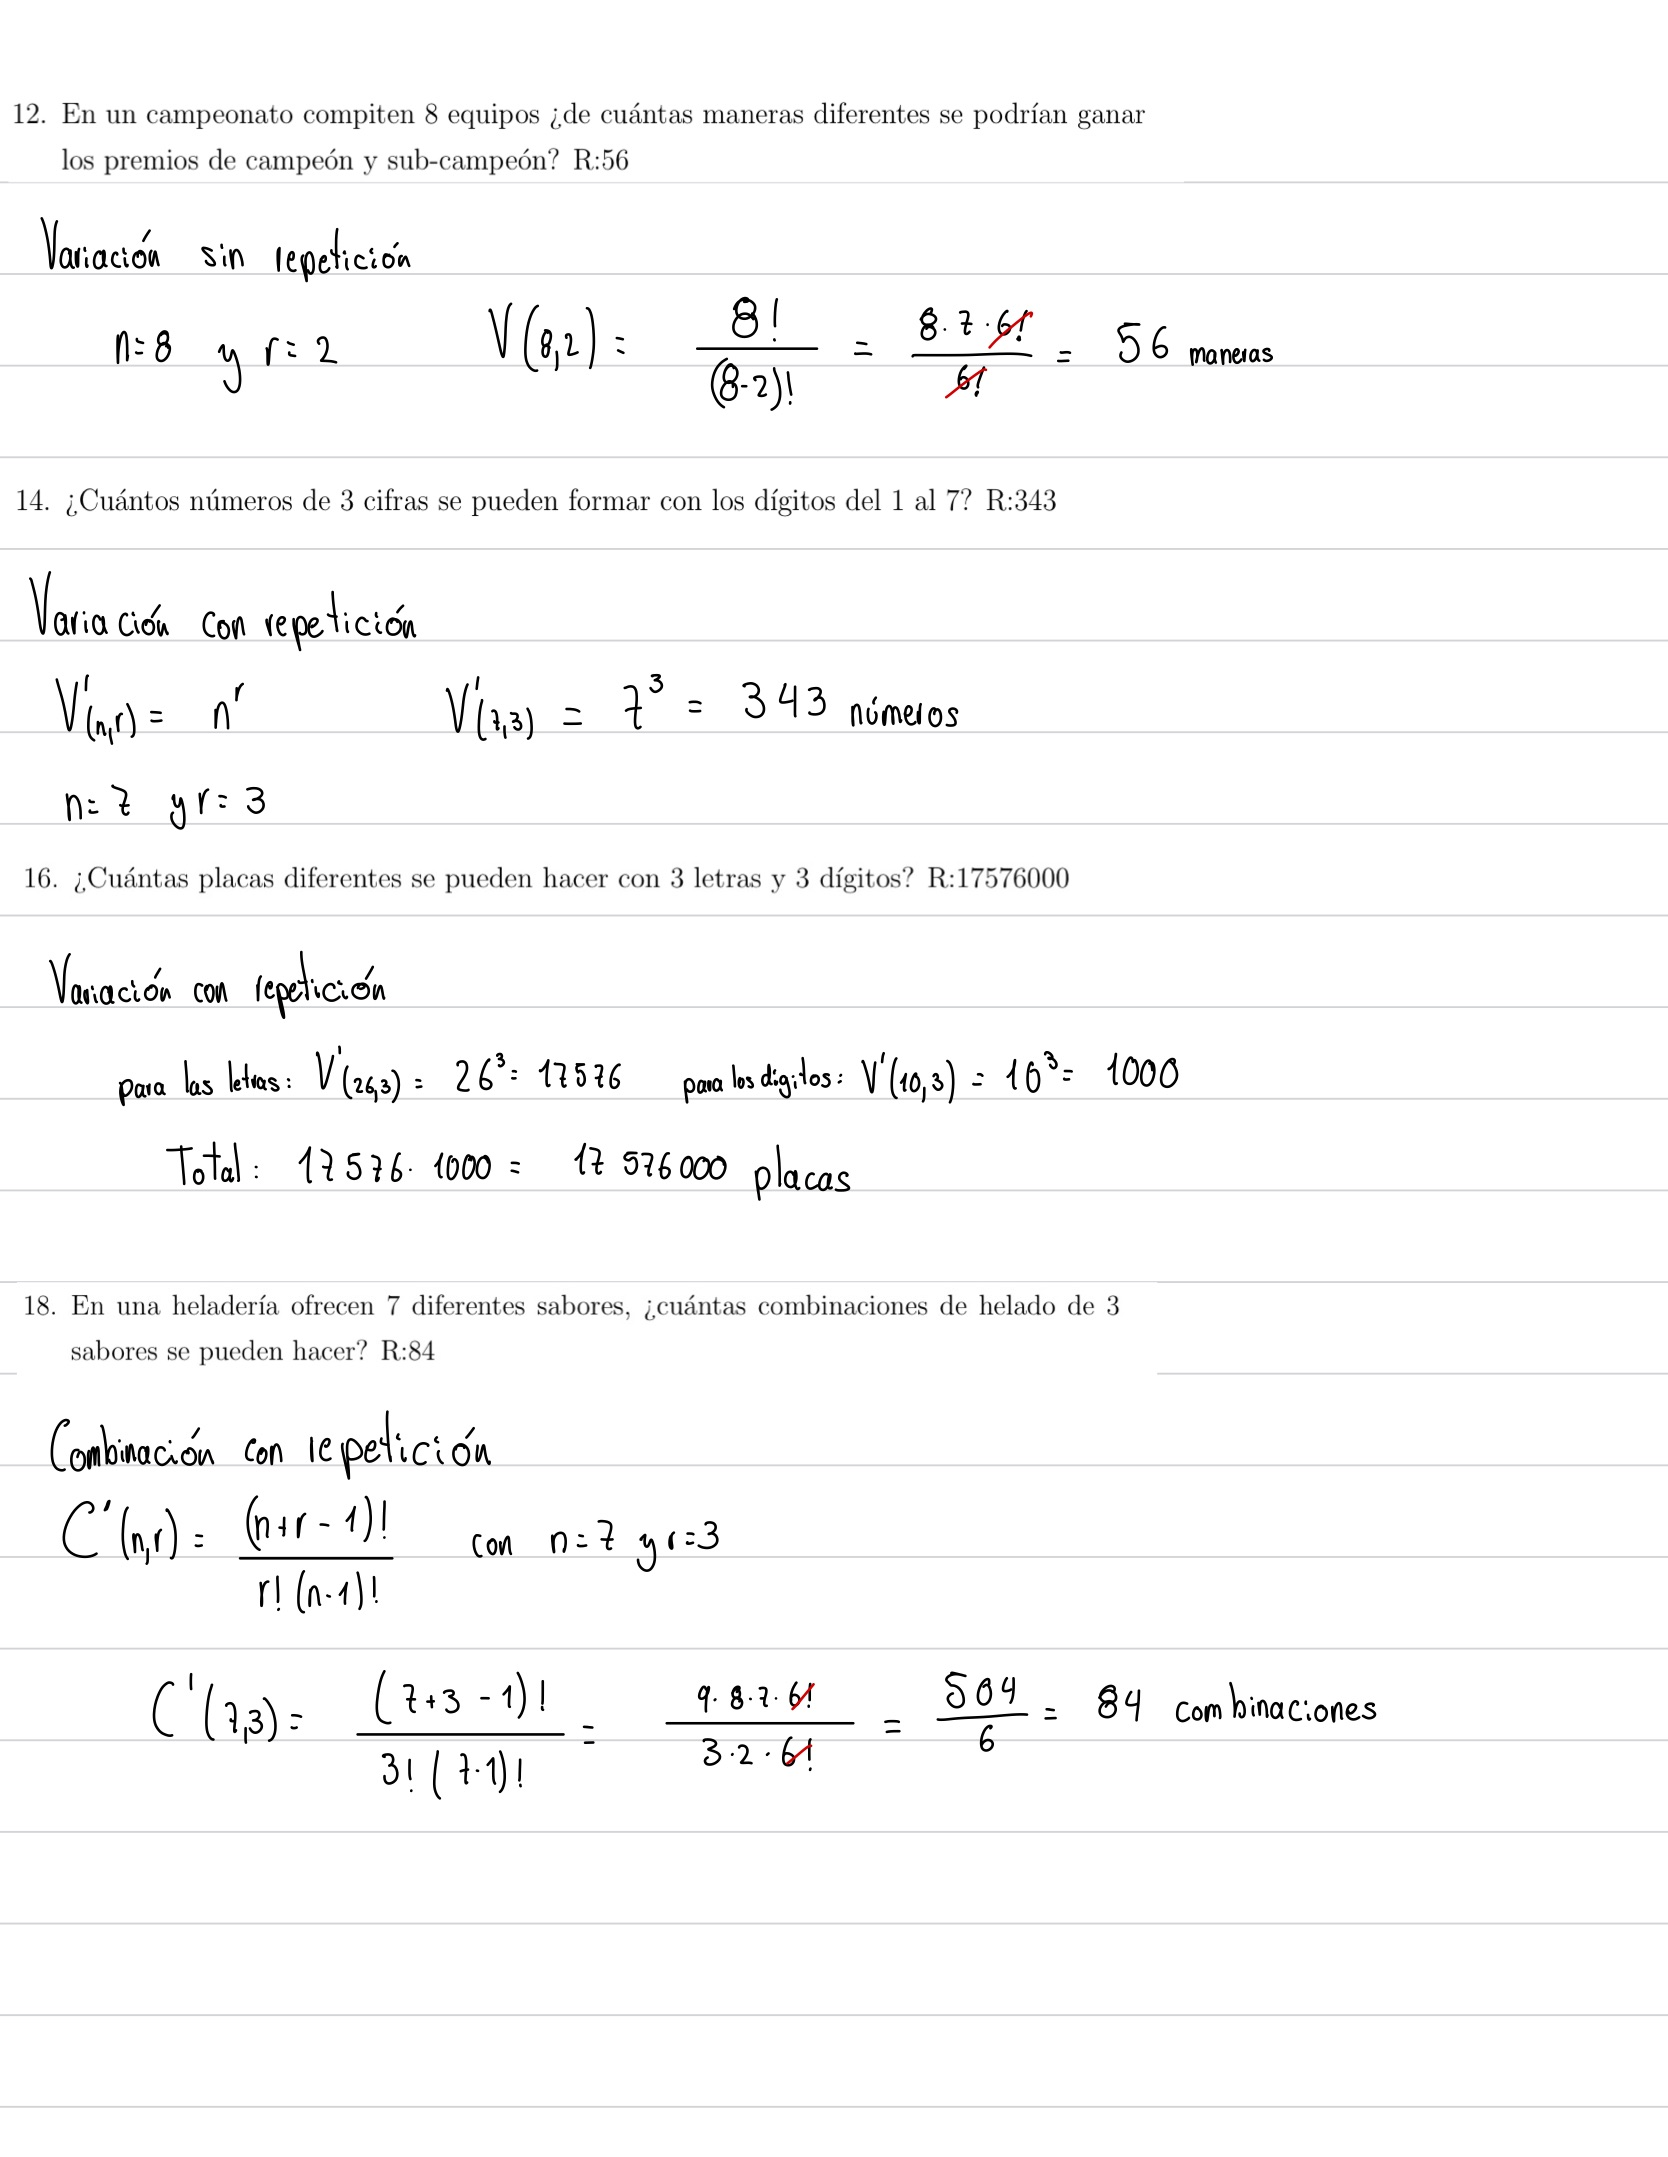